Based off the assignment description, we need to find the following: 
1. Average cars sold per month
2. Max cars sold per month
3. Min cars sold per month
4. Average cars sold per month by gender
5. Average hours worked by people selling more than three cars per month
6. Average years of experience
7. Average years of experience for people selling more than three cars per month
8. Average cars sold per month sorted by whether they have had sales training

In [1]:
import pandas as pd 
import seaborn as sns
df = pd.read_csv("axisdata.csv")

In [2]:
df.head()

,Fname,Lname,Gender,Hours Worked,SalesTraining,Years Experience,Cars Sold
0,Jada,Walters,F,39,N,3,2
1,Nicole,Henderson,F,46,N,3,6
2,Tanya,Moore,F,42,Y,4,6
3,Ronelle,Jackson,F,38,Y,5,3
4,Brad,Sears,M,33,N,4,2


Average, Max, Min, cars sold per month. We can simply call the describe function on a column to return all these aggregates at once. 

In [3]:
df['Cars Sold'].describe()


count    999.000000
mean       3.922923
std        1.527000
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: Cars Sold, dtype: float64

Seeing it by gender requires us to group our aggregation by a certain factor.

In [4]:
df.groupby(['Gender'])['Cars Sold'].mean()


Gender
F    3.760736
M    4.078431
Name: Cars Sold, dtype: float64

We can grab the average hours worked by people selling more than 3 cars in two steps: filtering the dataframe first, than computing our mean.

In [5]:
df_gt_3 = df[df['Cars Sold'].gt(3)]


print("The average hours worked by employees who sold more than 3 cars is approximately " 
      + str(round(df_gt_3['Cars Sold'].mean()))) 

The average hours worked by employees who sold more than 3 cars is approximately 5


Average experience is straightforward: 

In [6]:
df['Years Experience'].mean()

3.026026026026026

An alternative way to computing a mean after a filter in one line of code is by calling mean directly on the filtered dataframe (which also is a dataframe).

In [7]:
print("Summary Measures for Employees who sell more than 3 cars, on average, each month: ")
df[df['Cars Sold'].gt(3)].mean(numeric_only=True)

Summary Measures for Employees who sell more than 3 cars, on aeverage, each month: 


Hours Worked        34.740238
Years Experience     3.049236
Cars Sold            5.006791
dtype: float64

Seeing the average cars sold by month by whether an employee has sales training can be computed using our group by function used above:

In [8]:
df.groupby(['SalesTraining'])['Cars Sold'].mean()


SalesTraining
N    3.573850
Y    4.168942
Name: Cars Sold, dtype: float64

It would be important to know whether sales training has any impact on the amount of cars sold. We can visualize this question by creating a boxplot, and seeing whether the means differ signifcantly. Unfortunately for the Sales Training project, it seems to not be making an impact in terms of the average; although the variance is less for those who did have sales training.

Text(0.5, 1.0, 'Variance and mean by whether an employee has Sales Training ')

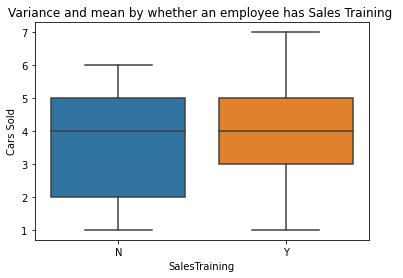

In [9]:
ax = sns.boxplot(x="SalesTraining", y="Cars Sold", data=df)
ax.set_title("Variance and mean by whether an employee has Sales Training ")

Something else that is worth knowing is whether the cars sold on average per month, based on gender, differ on whether or not an employee had sales training. In this case, despite variablity, the means do not differ signicantly.

Text(0.5, 1.0, 'Variance and mean by whether an employee has Sales Training, by gender ')

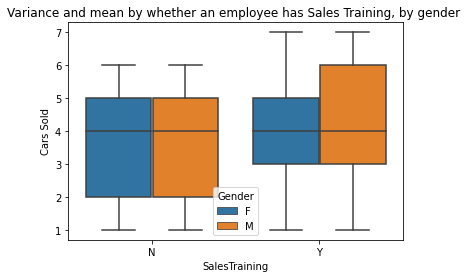

In [10]:
ax = sns.boxplot(x="SalesTraining", y="Cars Sold", hue = "Gender", data=df)
ax.set_title("Variance and mean by whether an employee has Sales Training, by gender")